# Supervised Learning


In [1]:
!pip install --upgrade pip
!pip install numpy matplotlib
!pip freeze > ../requirements.txt

## Linear Regression

Equation:
$$
 f_{w,b}(x) = wx + b
$$

In [13]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("../labs/deeplearning.mplstyle")

In [14]:
x_train = np.array([1.0, 2.0])  # (size in 1000 square feet)
y_train = np.array([300.0, 500.0])  # (price in 1000s of dollars)
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


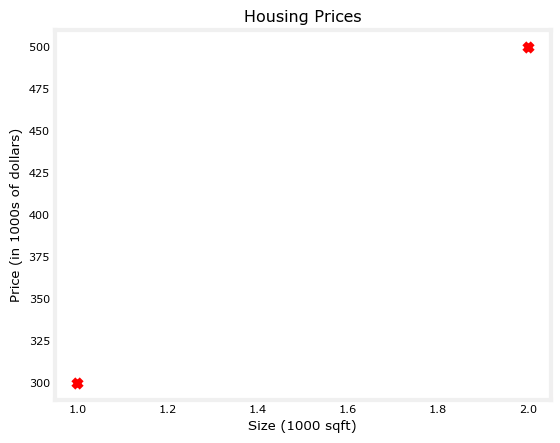

In [15]:
# Plot the data points
plt.scatter(x_train, y_train, marker="x", c="r")
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
# Set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.show()

In [16]:
w = 200
b = 100

Model output: [300. 500.]


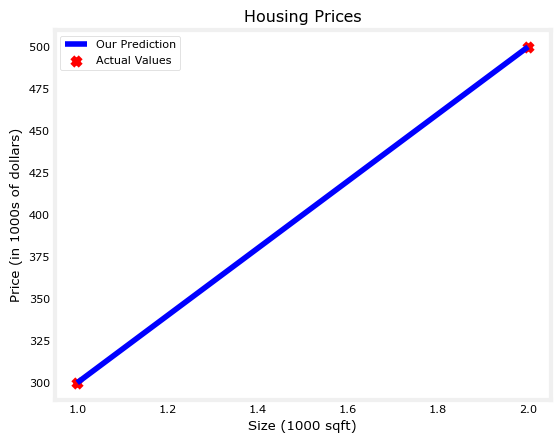

In [17]:
def predict(w, b, x):
    return w * x + b


def compute_model_output(w, b, x):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = predict(w, b, x[i])

    return f_wb


# compute the model output
model_output = compute_model_output(w, b, x_train)
print(f"Model output: {model_output}")

# Plot our model prediction
plt.plot(x_train, model_output, c="b", label="Our Prediction")

# Plot the data points
plt.scatter(x_train, y_train, marker="x", c="r", label="Actual Values")

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
# Set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

In [18]:
def linear_regression(x, y):
    # Calculate the mean of the size and price
    mean_size = sum(x) / len(x)
    mean_price = sum(y) / len(y)

    # Calculate the slope (w) and intercept (b)
    w = sum((x - mean_size) * (y - mean_price) for x, y in zip(x, y)) / sum(
        (x - mean_size) ** 2 for x in x
    )
    b = mean_price - w * mean_size

    return w, b

In [19]:
w, b = linear_regression(x_train, y_train)
print(f"Slope (w): {w}")
print(f"Intercept (b): {b}")

Slope (w): 200.0
Intercept (b): 100.0


In [20]:
# Predict the price of a house with a size of 1500
size = 12.0
predicted_price = predict(w, b, size)
print(f"Predicted price for a house with size {size}: {predicted_price}")

Predicted price for a house with size 12.0: 2500.0


## Cost Function


Equation:
$$
 J_{w,b} = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x_{(i)}) - y_{(i)})^2
$$


Weights: [  0 100 200 300 400]
Cost: [50000. 12500.     0. 12500. 50000.]
Current Cost: 0.0


/var/folders/4q/zg_6xsv109qg9txqw0dbz40w0000gn/T/ipykernel_36014/1114938150.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


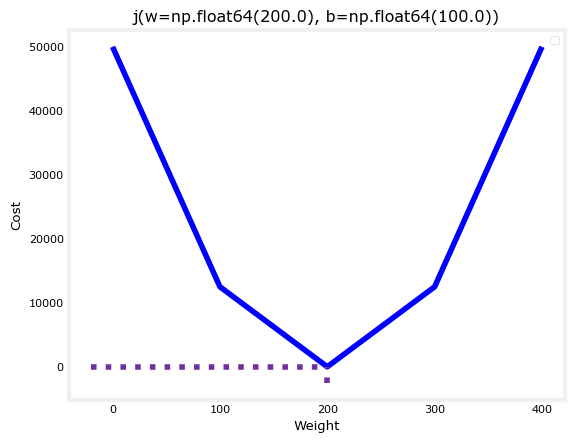

In [21]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost


weights = np.array(range(0, 500, 100))
print(f"Weights: {weights}")

j_wb = np.array([compute_cost(x_train, y_train, weight, b) for weight in weights])
print(f"Cost: {j_wb}")

cur_cost = compute_cost(x_train, y_train, w, b)
print(f"Current Cost: {cur_cost}")

# Plot our model prediction
plt.plot(weights, j_wb, c="b")
plt.hlines(cur_cost, plt.gca().get_xlim()[0], w, lw=4, color="#7030A0", ls="dotted")
plt.vlines(w, plt.gca().get_ylim()[0], cur_cost, lw=4, color="#7030A0", ls="dotted")

# Set the title
plt.title(f"j({w=}, {b=})")
# Set the y-axis label
plt.ylabel("Cost")
# Set the x-axis label
plt.xlabel("Weight")
plt.legend()
plt.show()

### Cost Function in 3D


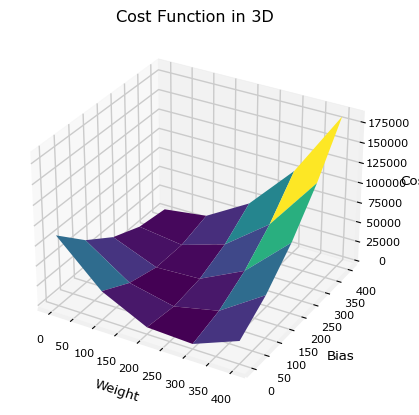

In [26]:
weights = np.array(range(0, 500, 100))
biases = np.array(range(0, 500, 100))

# Create a meshgrid for weights and biases
W, B = np.meshgrid(weights, biases)

# Compute the cost for each combination of weight and bias
Z = np.array(
    [
        [compute_cost(x_train, y_train, w, b) for w, b in zip(row_w, row_b)]
        for row_w, row_b in zip(W, B)
    ]
)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the surface
ax.plot_surface(W, B, Z, cmap="viridis")

# Set the title
ax.set_title("Cost Function in 3D")

# Set the x-axis label
ax.set_xlabel("Weight")

# Set the y-axis label
ax.set_ylabel("Bias")

# Set the z-axis label
ax.set_zlabel("Cost")

plt.show()

## Gradient Descent

Equations:

In order to find w and b, we need to compute the partial derivatives of J(w,b) with respect to w and b.

$$
  w = w - \alpha \frac{\partial J}{\partial w}(J(w,b))
$$
$$
  b = b - \alpha \frac{\partial J}{\partial b}(J(w,b))
$$
$$
  \text{where } \alpha \text{ is the learning rate}
$$

$w$ and $b$ are simultaneously updated.
